In [43]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [44]:

# model_directory = 'saved_models'
# model_filename = 'linear_regression_model.pth'
# model_file_path = os.path.join(model_directory, model_filename)

# # Ensure the directory exists, create it if it doesn't
# os.makedirs(model_directory, exist_ok=True)
# # Function to load or initialize the model
# def load_or_initialize_model(X_train, y_train):

#     # Load the model if it exists, otherwise initialize a new model
#     if os.path.exists(model_file_path):
#         print('Model exist so using it')
#         # input_size = X_train.shape[1]
#         # model = nn.Linear(input_size, 1).double()
#         # torch.save(model, model_file_path)
#         model = torch.load(model_file_path)
#     else:
#         print('Model does not exist so initialising from scratch')
#         input_size = X_train.shape[1]
#         model = nn.Linear(input_size, 1).double()
#         torch.save(model, model_file_path)
#     return model

In [45]:
#function to train the model
def modeltrain(X_train, y_train,l2_lambda=0.01,verbose=True):  # Specify the regularization strength (lambda)
    # global model
    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    if verbose==True:
        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
            loss = criterion(outputs, y_train.view(-1, 1))

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [64]:
#function to test the model

def modeltest(X_test,y_test,model,verbose=True):
    if verbose:
        print("Testing starting")
    
    # Assuming 'model' is your trained linear regression model
 
    with torch.no_grad():
        predictions = model(X_test)



    if verbose:
        print('testing over now accuracy analysis')

    correct_pred=0
    for i in range(len(predictions)):
       
        if(abs(predictions[i]-y_test[i])<0.5):
            
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    

    #loop used to extract few records for prediction of model on new data points
    # for i in range(8):
    #     print("prediction=",predictions[i],"target=",y_test[i],X_test[i][0])
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    
    if verbose==True:        
        print(f'Percentage Accuracy: {mean_accuracy:.2f}%')
        print(f'Mean Absolute Error: {mae}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [47]:

def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
    # feature_to_plot1 = X[:,0] 
    # feature_to_plot2 = X[:,1] 

    # feature_to_plot3 = X[:,2] 
    for i in range(len(y)):
        # list2.append([y[i].item(),z[i].item()])
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
    # plt.plot(y,z,alpha=0.5)
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [62]:
model=None
X_train=None
y_train=None
X_test=None
y_test=None
def tester(testing_row=None):
   
    if testing_row is None:
        print("input size is ",X_test.shape," and output size is ",(y_test.shape))
        # pred=0
        pred=modeltest(X_test,y_test,model,verbose=False)
        
    else:
        
        # print(X_test[testing_row].shape)
        # print(y_test[testing_row].shape)
        x1=X_test[testing_row].view(1,-1)
        y1=y_test[testing_row].view(1)
        print("input size is ",x1.shape," and output size is ",(y1.shape))
        # print(x1.shape)

        # print(y1.shape)
        pred=0
        pred=modeltest(x1,y1,model,verbose=False)
        pred1=pred.item()
        # print("---------------------------------------------------------")
        print("input features are : ",(x1).tolist())
        print("prediction is ",round(pred1,2))
        y1=y1.item()
        print("actual value is ",round(y1,2))
        print("relative error is ",round((y1-pred1)*100/y1,2),"%")
        print("---------------------------------------------------------")
        print()
    # print(type(pred))
    return pred
        


<class 'torch.Tensor'>
Epoch [100/1000], Loss: 4.115725681187166
Epoch [200/1000], Loss: 3.978238412987771
Epoch [300/1000], Loss: 3.9283948167059948
Epoch [400/1000], Loss: 3.9086581569489907
Epoch [500/1000], Loss: 3.899870855556368
Epoch [600/1000], Loss: 3.8953890203252595
Epoch [700/1000], Loss: 3.8927988078435862
Epoch [800/1000], Loss: 3.891154743127424


Epoch [900/1000], Loss: 3.8900449072596057
Epoch [1000/1000], Loss: 3.889266030783122
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 24.44%
Mean Absolute Error: 1.496978053616932
Mean Squared Error: 3.6098640417477466
R-squared: 0.9605388297442456
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


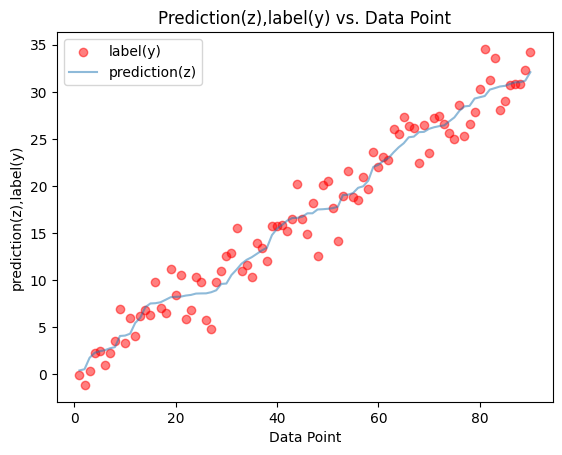

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------


In [49]:
# create_plot(X_train,y_train)
# model = load_or_initialize_model(X_train,y_train)

def train_with_selected_features(drop_features=[],testing=True):
    if type(drop_features)==type("string"):
        drop_features=[drop_features]
    global model
    global X_test
    global y_test
    global X_train
    global y_train
    
    #Data  proccessing and normalisation 

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if 'X3' not in drop_features:
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.

    drop_features.append('y')
    X = df.drop(columns=drop_features)
    # X = df.drop(columns=['y'])
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    
    X_test=X[train_size:]
    y_test=y[train_size:]

    print(type(y_test))
    
    model=modeltrain(X_train, y_train,l2_lambda=0.01,verbose=testing)  # You can adjust the regularization st

    # pred=modeltest(X_test,y_test,model)
    
    if testing==True:
        pred=tester()
        # print(X_test.shape,y_test.shape,pred.shape)
        print(type(y_test))
        print(type(pred))
        for i in [X_test,y_test,pred]:
        # for i in [X_test]:
            print(i.shape)
        create_plot(X_test,y_test,pred)
        
        print(model)
    print("------------------------------------------------")
    
    # return X_test

train_with_selected_features()

In [50]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    c=X_train[i][2]
    input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

# Extract the covariance between the two variables from the covariance matrix


# print("Covariance between input1 and input2:", covariance)

covariance_matrix1 = np.cov(input1, input3)
covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
covariance1 = covariance_matrix1[0, 1]
covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
print("Covariance between X2 and X3:", covariance1)
print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: 0.12740488844015435
Covariance between X2 and X3: 0.015396627005088991
Covariance between X3 and X1: -0.014171793119161571
Covariance between X1 and y: 24.942920604841778
Covariance between X2 and y: 0.9254363356859601
Covariance between X3 and y: 0.11293652151999131
---------------------------------------------------
Correlation Coefficient between X1 and y: 0.97
Correlation Coefficient between X2 and y: 0.20
Correlation Coefficient between X3 and y: 0.01


In [51]:
#




In [52]:
#Function  to remove any two features and train the model


Linear(in_features=3, out_features=1, bias=True)
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 4.334447756978106
Epoch [200/1000], Loss: 4.1095514449315695
Epoch [300/1000], Loss: 4.013333479211402
Epoch [400/1000], Loss: 3.96614574351532
Epoch [500/1000], Loss: 3.939770018573391
Epoch [600/1000], Loss: 3.9234835927248257
Epoch [700/1000], Loss: 3.9127664527141266
Epoch [800/1000], Loss: 3.9054478421966365
Epoch [900/1000], Loss: 3.9003416641818522
Epoch [1000/1000], Loss: 3.896731031708363
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 22.22%
Mean Absolute Error: 1.5045289843046956
Mean Squared Error: 3.6215856996563236
R-squared: 0.9604106946308284
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


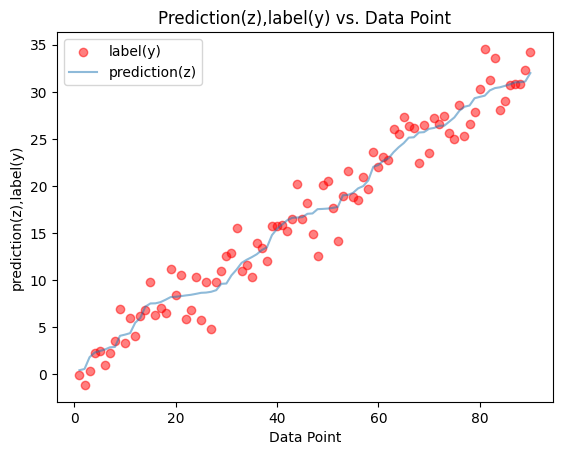

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 90.5251609279994
Epoch [200/1000], Loss: 85.0082681739199
Epoch [300/1000], Loss: 82.29255231910138
Epoch [400/1000], Loss: 80.78278189915069
Epoch [500/1000], Loss: 79.87237764004624
Epoch [600/1000], Loss: 79.29650379559413
Epoch [700/1000], Loss: 78.92207981453217
Epoch [800/1000], Loss: 78.67441890485365
Epoch [900/1000], Loss: 78.5085260787656
Epoch [1000/1000], Loss: 78.39617738964478
Training Done
input size is  torch.Size([90, 2])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 4.44%
Mean Absolute Error: 8.406108562007446
Mean Squared Error: 92.7420545096815
R-squared: -0.013808265505511175
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 2])
torch.Size([90])
torch.Size([90, 1])


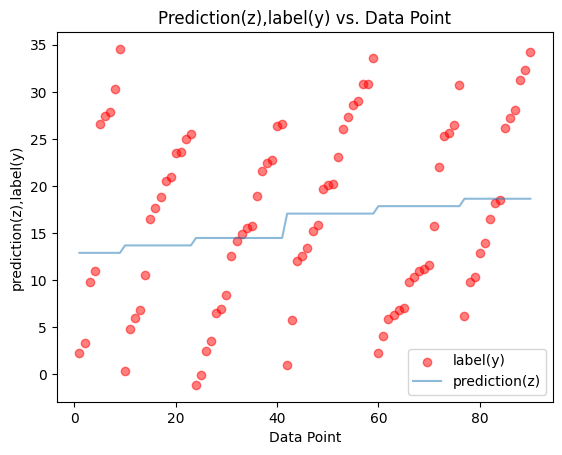

Linear(in_features=2, out_features=1, bias=True)
------------------------------------------------
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 5.145011869593359
Epoch [200/1000], Loss: 5.075298916559673
Epoch [300/1000], Loss: 5.049160515551709
Epoch [400/1000], Loss: 5.0393375962335245
Epoch [500/1000], Loss: 5.035632398944199
Epoch [600/1000], Loss: 5.0342264754002946
Epoch [700/1000], Loss: 5.03368796273792
Epoch [800/1000], Loss: 5.033478662635931
Epoch [900/1000], Loss: 5.03339550737596
Epoch [1000/1000], Loss: 5.033361407490881
Training Done
input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 18.89%
Mean Absolute Error: 1.7367604226644775
Mean Squared Error: 4.649932870172761
R-squared: 0.9491693342060392
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 1])
torch.Size([90])
torch.Size([90, 1])


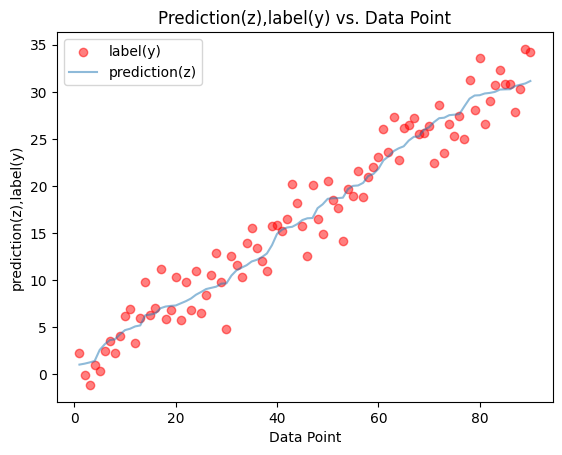

Linear(in_features=1, out_features=1, bias=True)
------------------------------------------------


In [53]:
### You can uncomment these two to run the code for model predictions by removing one and two features respectively.


print(model)
train_with_selected_features()

# Function  to remove any one features and train the model
train_with_selected_features('X1')

# Function  to remove any one features and train the model
train_with_selected_features(['X2','X3'])

# all

In [54]:
# doesnt alter model, only tests:
# testing over all values:
tester()



input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 18.89%
Mean Absolute Error: 1.7367604226644775
Mean Squared Error: 4.649932870172761
R-squared: 0.9491693342060392
<class 'torch.Tensor'>
Training Done
------------------------------------------------
torch.Size([3])
torch.Size([])
torch.Size([1, 3])
torch.Size([1])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 0.00%
Mean Absolute Error: 25.055576524263913
Mean Squared Error: 627.7819149632448
R-squared: nan
---------------------------------------------------------
input features are :  [[6.630782031001008, 0.0, 2.0]]
prediction is  -4.15
actual value is  20.9
relative error is  119.86 %
---------------------------------------------------------
<class 'torch.Tensor'>
Training Done
------------------------------------------------
torch.Size([1])
torch.Size([])
torch.Size([1, 1])
torch.Size([1])
Testing starting
testi

c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


tensor([[6.5629]], dtype=torch.float64)

In [63]:
# testing for particular value with all features:
train_with_selected_features(testing=False)
tester(2)

# testing for particular value with only X1 feature:
train_with_selected_features(['X2','X3'],testing=False)
tester(2)

<class 'torch.Tensor'>
Training Done
------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
input features are :  [[6.630782031001008, 0.0, 2.0]]
prediction is  -0.08
actual value is  20.9
relative error is  100.37 %
---------------------------------------------------------

<class 'torch.Tensor'>
Training Done
------------------------------------------------
input size is  torch.Size([1, 1])  and output size is  torch.Size([1])
input features are :  [[6.630782031001008]]
prediction is  -0.79
actual value is  20.9
relative error is  103.77 %
---------------------------------------------------------



c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


tensor([[-0.7874]], dtype=torch.float64)